In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#read the csv file into pandas dataframe
df = pd.read_csv('census11.csv')

In [3]:
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Regentchain Avenue,Ashleigh,Dale,41,Head,Divorced,Female,Field trials officer,None,Catholic
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,NaN,Female,Student,None,NaN
2,1,Regentchain Avenue,Gary,Dale,7,Son,NaN,Male,Student,None,NaN
3,2,Regentchain Avenue,Edward,Grant,40,Head,Married,Male,Environmental education officer,None,Methodist
4,2,Regentchain Avenue,Elizabeth,Grant,35,Wife,Married,Female,Public librarian,None,Catholic


In [5]:
df.sample(15)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1799,4,Khan Village,Garry,Whitehead,16,Son,NaN,Male,Student,None,NaN
3411,5,Roberts Inlet,Alice,O'Sullivan,37,Partner,Single,Female,Psychotherapist,None,Christian
7467,55,Canterbury Well,Tracey,Kay,30,Head,Divorced,Female,Unemployed,None,Methodist
3240,133,Harvey Road,Marc,Hughes,60,None,Single,Male,"Teacher, special educational needs",None,None
2373,26,Davies Avenue,Philip,Bennett,27,Partner,Single,Male,Police officer,None,None
8343,1,Parrot Hall,Angela,Knight,31,None,Single,Female,Immunologist,None,Christian
3724,9,Rogers Plains,Susan,Taylor,1,Daughter,NaN,Female,Child,None,NaN
7539,34,Daffodilhatch Street,Toby,Norton,56,Partner,Single,Male,Audiological scientist,None,None
7531,31,Daffodilhatch Street,Margaret,Adams,59,Head,Single,Female,Risk analyst,None,None
5121,11,Fitzgerald Road,Kimberley,Wilkinson,31,Wife,Married,Female,"Designer, interior/spatial",None,None


## Data Assessment

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8377 non-null   int64 
 1   Street                         8377 non-null   object
 2   First Name                     8377 non-null   object
 3   Surname                        8377 non-null   object
 4   Age                            8377 non-null   object
 5   Relationship to Head of House  8377 non-null   object
 6   Marital Status                 6402 non-null   object
 7   Gender                         8377 non-null   object
 8   Occupation                     8377 non-null   object
 9   Infirmity                      8377 non-null   object
 10  Religion                       6365 non-null   object
dtypes: int64(1), object(10)
memory usage: 720.0+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(8377, 11)

## Data Cleaning

#### Marital Status

In [9]:
df['Marital Status'].value_counts()

Single      2999
Married     2224
Divorced     791
Widowed      387
               1
Name: Marital Status, dtype: int64

- There is a particular record with a blank value as its marital status
- Identify the record and adequately replace the value with an appropriate marital status based on the details from other fields.

In [10]:
#identify the record with " " as its marital status value
df[df['Marital Status'] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4230,47,Chan Estate,Norman,Ward,25,Son,,Male,Administrator,None,None


- The record shows that the subject with a blank marital status is a son to the head of the house and of the age 25.
- Adequately check the entire household that the subject belongs to and come to a conclusion of giving a value of "Single"

In [14]:
df.iloc[4228:4232, :]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4228,47,Chan Estate,Jemma,Ward,41,Head,Married,Female,Unemployed,None,Christian
4229,47,Chan Estate,Maurice,Ward,44,Husband,Married,Male,Unemployed,None,Christian
4230,47,Chan Estate,Norman,Ward,25,Son,,Male,Administrator,None,None
4231,47,Chan Estate,Ronald,Ward,12,Son,NaN,Male,Student,None,NaN


- The blank value will be replaced with 'Single' since the guy is more than 18 and is not yet married.

In [15]:
df['Marital Status'].replace(" ", "Single", inplace=True)

In [16]:
df['Marital Status'].value_counts()

Single      3000
Married     2224
Divorced     791
Widowed      387
Name: Marital Status, dtype: int64

- The nan values in Marital status column are for children and students that are less than 18. Hence, the nan values will be replaced with "Minor"

In [198]:
df['Marital Status'].replace(np.nan, "Minor", inplace=True)

In [199]:
df['Marital Status'].value_counts()

Single      3000
Married     2224
Minor       1975
Divorced     791
Widowed      387
Name: Marital Status, dtype: int64

##### Age

In [17]:
df['Age'].describe()

count     8377
unique     118
top         19
freq       158
Name: Age, dtype: object

In [18]:
df['Age'].value_counts()

19                    158
38                    157
46                    156
36                    152
47                    147
                     ... 
63.841399743989754      1
107                     1
75.27548655560247       1
21.999999999999993      1
17.999999999999993      1
Name: Age, Length: 118, dtype: int64

In [19]:
df['Age'].unique()

array(['41', '11', '7', '40', '35', '19', '17', '60', '62', '30', '42',
       '46', '4', '78', '81', '43', '44', '24', '57', '53', '32', '12',
       '9', '85', '58', '59', '26', '90', '97', '63', '18', '15', '10',
       '47', '16', '13', '36', '6', '2', '1', '25', '56', '38', '21',
       '31', '74', '67', '65', '71', '79', '45', '61', '72', '54', '33',
       '34', '23', '28', '29', '91', '64', '80', '76', '49', '73', '50',
       '84', '75', '48', '14', '51', '22', '66', '20', '77', '0', '27',
       '86', '68', '5', '83', '55', '69', '70', '39', '82', '88', '37',
       '52', '8', '3', '87', '105', '95', '96', '89', '92', '93', '99',
       '101', '98', '116', '112', '94', '59.782817341882584', '9.0',
       '102', '103', ' ', '100', '104', '106', '59.841399743989754',
       '63.841399743989754', '107', '75.27548655560247',
       '21.999999999999993', '17.999999999999993'], dtype=object)

- The age column is considered an object data type. It should be an integer
- This is due to the inconsistencies in the values of the column. The values will be appropriately cleaned and the column converted to integer

In [20]:
df[df['Age'] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4000,6,Pendragon Lane,Howard,Baker,,Son,Single,Male,University Student,None,Methodist


- The record with a blank value is single and a University student which shows that he is more than 18.
- The blank value will be replaced with '19' because 19 is the most frequent for subjects that are more single and University Student.
- Other floats will be replaced with the value before the decimal point.

In [21]:
#replace the values with appropriate ones
df['Age'].replace(" ", 19, inplace=True)
df['Age'].replace("59.782817341882584", 59, inplace=True)
df['Age'].replace("9.0", 9, inplace=True)
df['Age'].replace("59.841399743989754", 59, inplace=True)
df['Age'].replace("63.841399743989754", 63, inplace=True)
df['Age'].replace("75.27548655560247", 75, inplace=True)
df['Age'].replace("21.999999999999993", 21, inplace=True)
df['Age'].replace("17.999999999999993", 17, inplace=True)

In [23]:
#convert the data type to int
df['Age'] = df['Age'].astype(int)

In [24]:
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8377 non-null   int64 
 1   Street                         8377 non-null   object
 2   First Name                     8377 non-null   object
 3   Surname                        8377 non-null   object
 4   Age                            8377 non-null   int32 
 5   Relationship to Head of House  8377 non-null   object
 6   Marital Status                 6402 non-null   object
 7   Gender                         8377 non-null   object
 8   Occupation                     8377 non-null   object
 9   Infirmity                      8377 non-null   object
 10  Religion                       6365 non-null   object
dtypes: int32(1), int64(1), object(9)
memory usage: 687.3+ KB


##### Gender

In [25]:
df['Gender'].value_counts()

Female    4371
Male      4003
             3
Name: Gender, dtype: int64

In [26]:
df[df['Gender'] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1002,1,Taylor Grove,Pamela,Edwards,69,Head,Married,,"Retired Engineer, technical sales",None,Christian
6899,8,Tiger Avenue,Leanne,Gill,22,None,Single,,University Student,None,None
7348,25,Canterbury Well,Irene,Harvey,51,Head,Married,,"Librarian, public",None,Christian


- There are three records with blank Gender
- Each household that each record belongs to will be examined to determine the gender of the subjects. If these cannot be determined, they will be converted to NaN

In [27]:
#first record
df.iloc[1002:1005, :]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1002,1,Taylor Grove,Pamela,Edwards,69,Head,Married,,"Retired Engineer, technical sales",None,Christian
1003,1,Taylor Grove,Garry,Edwards,72,Husband,Married,Male,Retired Ophthalmologist,None,Christian
1004,2,Taylor Grove,Olivia,Rose,73,Head,Widowed,Female,Retired Ergonomist,None,None


- Record 1002's gender will be Female because of the presence of her husband in the household.

In [29]:
df.at[1002, 'Gender'] = "Female"

In [30]:
df.iloc[1002, :]

House Number                                                     1
Street                                                Taylor Grove
First Name                                                  Pamela
Surname                                                    Edwards
Age                                                             69
Relationship to Head of House                                 Head
Marital Status                                             Married
Gender                                                      Female
Occupation                       Retired Engineer, technical sales
Infirmity                                                     None
Religion                                                 Christian
Name: 1002, dtype: object

In [32]:
#second record
df.iloc[6898:6902, :]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6898,8,Tiger Avenue,Gillian,Smith,43,Head,Single,Female,Database administrator,None,Christian
6899,8,Tiger Avenue,Leanne,Gill,22,None,Single,,University Student,None,None
6900,1,Squirrel Street,Gareth,Glover,20,Head,Single,Male,University Student,None,None
6901,1,Squirrel Street,Kieran,Hancock,21,None,Single,Male,University Student,None,Christian


- This shows that records 6898 and 6899 are housemates with no relationship. It is only rational that both of them will be of the same gender since they stay in the same apartment.

In [35]:
df.at[6899, 'Gender'] = "Female"

In [36]:
df.iloc[6899, :]

House Number                                      8
Street                                 Tiger Avenue
First Name                                   Leanne
Surname                                        Gill
Age                                              22
Relationship to Head of House                  None
Marital Status                               Single
Gender                                       Female
Occupation                       University Student
Infirmity                                      None
Religion                                       None
Name: 6899, dtype: object

In [38]:
df.iloc[7348:7352, :]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7348,25,Canterbury Well,Irene,Harvey,51,Head,Married,,"Librarian, public",None,Christian
7349,25,Canterbury Well,Christopher,Harvey,55,Husband,Married,Male,Curator,None,Christian
7350,25,Canterbury Well,Carolyn,Harvey,28,Daughter,Single,Female,Land/geomatics surveyor,None,Christian
7351,25,Canterbury Well,Holly,Harvey,12,Daughter,NaN,Female,Student,None,NaN


- The Gender value of record 7348 will be replaced with Female because the household details shows that she is the wife to record 7349

In [39]:
df.at[7348, 'Gender'] = "Female"

In [40]:
df.iloc[7348, :]

House Number                                    25
Street                             Canterbury Well
First Name                                   Irene
Surname                                     Harvey
Age                                             51
Relationship to Head of House                 Head
Marital Status                             Married
Gender                                      Female
Occupation                       Librarian, public
Infirmity                                     None
Religion                                 Christian
Name: 7348, dtype: object

In [41]:
#check
df['Gender'].value_counts()

Female    4374
Male      4003
Name: Gender, dtype: int64

In [42]:
df['Gender'].isnull().sum()

0

##### Occupation

In [43]:
df['Occupation'].value_counts()

Student                                     1584
University Student                           533
Unemployed                                   529
Child                                        473
Armed forces operational officer              16
                                            ... 
Retired Lecturer, higher education             1
Retired Theme park manager                     1
Retired Psychologist, counselling              1
Retired Surveyor, commercial/residential       1
Retired Counsellor                             1
Name: Occupation, Length: 1084, dtype: int64

- There seems to be many retired workers. Categorize all retired workers into Retirees.

In [45]:
#categorize all retired workers into retirees
df.loc[df['Occupation'].str.contains('Retired', case=False), 'Occupation'] = 'Retiree'

In [46]:
df['Occupation'].value_counts()

Student                            1584
Retiree                             749
University Student                  533
Unemployed                          529
Child                               473
                                   ... 
Herpetologist                         2
                                      1
Commercial/residential surveyor       1
Optometrist                           1
Technical brewer                      1
Name: Occupation, Length: 646, dtype: int64

In [47]:
df['Occupation'].unique()

array(['Field trials officer', 'Student',
       'Environmental education officer', 'Public librarian',
       'University Student',
       'Clinical scientist, histocompatibility and immunogenetics',
       'Arts development officer', 'Unemployed',
       'Physiological scientist', 'Site engineer', 'Child', 'Retiree',
       'Equality and diversity officer', 'Surveyor, building',
       'Contracting civil engineer', 'Editor, film/video',
       'Hospital doctor', 'Engineer, civil (consulting)',
       'Engineer, manufacturing', 'Sports therapist', 'Fish farm manager',
       'Hydrographic surveyor', 'Furniture conservator/restorer', 'Actor',
       'Engineer, manufacturing systems', 'Human resources officer',
       'Broadcast journalist', 'Editor, commissioning', 'Set designer',
       'Production designer, theatre/television/film',
       'Therapist, sports', 'Health promotion specialist',
       'Nurse, mental health', 'Translator',
       'Tourist information centre manager',
    

In [48]:
df[df['Occupation'] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3399,194,Harvey Road,Josephine,Anderson,73,Head,Divorced,Female,,None,Christian


- The age of the record 3399 shows that she would be a retiree.
- Replace the blank value of this record with Retiree

In [49]:
df.at[3399, 'Occupation'] = 'Retiree'

- Classify the PhD students as University students.

In [50]:
df['Occupation'].replace('PhD Student', 'University Student', inplace=True)

- Are there minors that are not students?

In [55]:
df.loc[(df['Age'] < 18) & (df['Occupation'] != "Student") & (df['Occupation'] != "Child")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7508,14,Daffodilhatch Street,Chloe,Lewis,16,Head,Divorced,Female,Unemployed,None,NaN


- This is quite odd for a 16-year old to be divorced and unemployed at the same time. It's quite inconsistent. It's an outlier.
- Check the household of this record.

In [58]:
df.iloc[7508:7510, :]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7508,14,Daffodilhatch Street,Chloe,Lewis,16,Head,Divorced,Female,Unemployed,None,NaN
7509,14,Daffodilhatch Street,Fiona,Lewis,0,Daughter,NaN,Female,Child,None,NaN


- So she has a child. There is a probability that the minor dropped out of school. 
- There is just one minor that is not a student.

In [59]:
df['Occupation'].value_counts()

Student                            1584
Retiree                             750
University Student                  543
Unemployed                          529
Child                               473
                                   ... 
Herpetologist                         2
Systems developer                     2
Technical brewer                      1
Commercial/residential surveyor       1
Optometrist                           1
Name: Occupation, Length: 644, dtype: int64

In [200]:
df['Occupation'].isnull().sum()

0

##### Create a new column showing the Employment status of the people

In [60]:
#create an employment status column
employment_status = []
for row in df['Occupation']:
    if row == 'Child':
        employment_status.append('Child')
    elif row == 'Student':
        employment_status.append('Student')
    elif row == 'University Student':
        employment_status.append('University Student')
    elif row == 'Retiree':
        employment_status.append('Retiree')
    elif row == 'Unemployed':
        employment_status.append('Unemployed')
    else:
        employment_status.append('Employed')
        

In [61]:
df['Employment Status'] = employment_status

In [62]:
df.head(2)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
0,1,Regentchain Avenue,Ashleigh,Dale,41,Head,Divorced,Female,Field trials officer,None,Catholic,Employed
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,NaN,Female,Student,None,NaN,Student


##### Create a new column showing the age groups

In [63]:
df['Age'].describe()

count    8377.000000
mean       36.305479
std        21.781495
min         0.000000
25%        19.000000
50%        36.000000
75%        51.000000
max       116.000000
Name: Age, dtype: float64

In [94]:
bins = [-1, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99, 104, 109, 114, 118]
labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100-104', '105-109', '110-114', '115+']
df['Age group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [65]:
df.head(1)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status,Age group
0,1,Regentchain Avenue,Ashleigh,Dale,41,Head,Divorced,Female,Field trials officer,None,Catholic,Employed,40-44


In [96]:
df['Age group'].isnull().sum()

0

##### Religion

In [66]:
df['Religion'].value_counts()

None           2840
Christian      1956
Catholic        885
Methodist       499
Muslim           97
Sikh             40
Jewish           36
Buddist           3
Jedi              2
                  2
Quaker            1
Housekeeper       1
Pagan             1
Private           1
Orthodoxy         1
Name: Religion, dtype: int64

- Blank value, House keeper, Private are not religions. Hence, they will be converted to NaN values.

In [67]:
df[df['Religion'] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status,Age group
4288,12,Jones Ramp,Jane,Armstrong,46,Wife,Married,Female,Garment/textile technologist,None,,Employed,45-49
7487,58,Canterbury Well,Christopher,Cole,15,Son,NaN,Male,Student,None,,Student,15-19


In [68]:
df['Religion'].replace(" ", np.nan, inplace=True)
df['Religion'].replace("Housekeeper", np.nan, inplace=True)
df['Religion'].replace("Private", np.nan, inplace=True)

In [71]:
df['Religion'].value_counts()

None         2840
Christian    1956
Catholic      885
Methodist     499
Muslim         97
Sikh           40
Jewish         36
Buddist         3
Jedi            2
Quaker          1
Pagan           1
Orthodoxy       1
Name: Religion, dtype: int64

In [72]:
df['Religion'].isnull().sum()

2016

In [74]:
df.groupby('Religion')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Religion,,,,,,,,
Buddist,3.0,29.666667,18.475209,19.0,19.00,19.0,35.0,51.0
Catholic,885.0,44.114124,16.228483,18.0,34.00,42.0,51.0,102.0
Christian,1956.0,49.942229,18.229041,18.0,36.00,51.0,62.0,116.0
Jedi,2.0,62.000000,1.414214,61.0,61.50,62.0,62.5,63.0
Jewish,36.0,39.611111,14.959522,19.0,27.00,36.5,48.0,70.0
Methodist,499.0,45.663327,17.872678,18.0,32.00,43.0,57.0,100.0
Muslim,97.0,34.556701,14.879354,18.0,24.00,29.0,42.0,94.0
None,2840.0,42.118310,16.694278,18.0,29.00,40.0,52.0,107.0
Orthodoxy,1.0,45.000000,NaN,45.0,45.00,45.0,45.0,45.0


##### Infirmity

In [73]:
df['Infirmity'].value_counts()

None                   8308
Physical Disability      18
                         13
Mental Disability        10
Blind                     9
Disabled                  8
Deaf                      7
Unknown Infection         4
Name: Infirmity, dtype: int64

In [75]:
df[df['Infirmity'] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status,Age group
102,2,Smith Port,Reece,Knight,28,Head,Married,Male,Garment/textile technologist,,None,Employed,25-29
258,106,Smith Port,Raymond,Brookes,27,Head,Divorced,Male,"Programmer, multimedia",,None,Employed,25-29
1593,26,Brady Creek,Adam,Hewitt,64,Husband,Married,Male,Unemployed,,None,Unemployed,60-64
4053,20,Pendragon Lane,Diane,Rees,9,Granddaughter,NaN,Female,Student,,NaN,Student,5-9
5554,12,Manor Flats,Garry,Williamson,46,Head,Single,Male,Local government officer,,Christian,Employed,45-49
5637,60,Manor Flats,Vincent,Walker,43,Husband,Married,Male,Equality and diversity officer,,None,Employed,40-44
5730,2,Hewitt Avenue,Teresa,Jones,7,Daughter,NaN,Female,Student,,NaN,Student,5-9
5802,3,CherryChestnut Spurs,Victor,Fletcher,16,Son,NaN,Male,Student,,NaN,Student,15-19
5807,5,CherryChestnut Spurs,Valerie,Dixon,5,Daughter,NaN,Female,Student,,NaN,Student,5-9
6681,65,ExcaliburBellsby Drive,Hannah,Charlton,63,None,Single,Female,Tree surgeon,,None,Employed,60-64


- The blank values will be converted to null values since there are no details that can point to the presence of infirmity.

In [76]:
#convert blank values to NaN values
df['Infirmity'].replace(" ", np.nan, inplace=True)

In [77]:
df['Infirmity'].isnull().sum()

13

##### Create a column of commuters and non-commuters

- Classify professions that can be done remotely as non-commuting jobs
- Students, child, unemployed, primary and secondary school teachers also considered non commuters
- University Students are commute

In [214]:
#designers, analysts, school teachers
non_commuters = ['designer', 'rural', 'developer', 'analyst', 'copywrighter', 'data', 'secondary school', 'teacher', 'Retiree', 'Child', 'Unemployed']
commuter_status = []
for row in df['Occupation']:
    if any(string in row for string in non_commuters):
        commuter_status.append('Non commuter')
    elif row == "University Student":
        commuter_status.append('Commuter')
    else:
        commuter_status.append('Commuter')


In [215]:
df['Commuter Status'] = commuter_status

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House Number                   8377 non-null   int64   
 1   Street                         8377 non-null   object  
 2   First Name                     8377 non-null   object  
 3   Surname                        8377 non-null   object  
 4   Age                            8377 non-null   int32   
 5   Relationship to Head of House  8377 non-null   object  
 6   Marital Status                 6402 non-null   object  
 7   Gender                         8377 non-null   object  
 8   Occupation                     8377 non-null   object  
 9   Infirmity                      8364 non-null   object  
 10  Religion                       6361 non-null   object  
 11  Employment Status              8377 non-null   object  
 12  Age group                      837

##### Household Occupancy 

- To determine household occupancy, combining the house number and the street will be important.

In [98]:
#combining the house number and street
df['House Street'] = df['House Number'].astype(str) + "-" + df['Street']

In [99]:
#calculate the number of people in each household
Occupancy = df['House Street'].value_counts()

In [100]:
df_h = pd.DataFrame(Occupancy)

In [101]:
df_h = df_h.reset_index()

In [102]:
df_h.columns = ['House Street', 'Occupancy level']

In [103]:
df_h.head()

,House Street,Occupancy level
0,42-Davies Avenue,22
1,13-Davies Avenue,21
2,1-Thames Villa,19
3,33-Davies Avenue,19
4,7-November Falls,18


In [104]:
#merge dataframes df and df_h together
df = pd.merge(df, df_h, how='inner', on = 'House Street')
df.head(3)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status,Age group,Commuter Status,House Street,Occupancy level
0,1,Regentchain Avenue,Ashleigh,Dale,41,Head,Divorced,Female,Field trials officer,None,Catholic,Employed,40-44,Commuter,1-Regentchain Avenue,3
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,NaN,Female,Student,None,NaN,Student,10-14,Non commuter,1-Regentchain Avenue,3
2,1,Regentchain Avenue,Gary,Dale,7,Son,NaN,Male,Student,None,NaN,Student,5-9,Non commuter,1-Regentchain Avenue,3


##### House Number

In [182]:
df['House Number'].value_counts()

1      372
3      265
7      250
5      249
2      247
      ... 
193      1
194      1
195      1
196      1
197      1
Name: House Number, Length: 197, dtype: int64

In [183]:
df['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

##### Surname

In [184]:
df['Surname'].unique()

array(['Dale', 'Grant', 'Hall', 'Price', 'Dean', 'Taylor', 'Stevenson',
       'Austin', 'Miles', 'Johnson', 'Elliott', 'Cooper', 'Webster',
       'Stone', 'Duncan', 'Jones', 'Long', 'Cross', 'Wall', 'Williams',
       'Ellis', 'Webb', 'Conway', 'Morton', 'Hooper', 'Thompson', 'Patel',
       ' ', 'Warren', 'Smith', 'Giles', 'Clark', 'James', 'Coates',
       'Carr', 'Henderson', 'Harrison', 'Hart', 'Burgess', 'Turnbull',
       'Freeman', 'Manning', 'Richardson', 'Davies', 'Rowley', 'Shaw',
       'Wilson', 'Watson', 'Khan', 'Allen', 'Lewis', 'Barton', 'Bates',
       'Walker', 'Butler', 'Knight', 'Little', 'George', 'Barker', 'Cox',
       'Nash', 'Harris', 'Potter', 'Day', 'Cooke', 'Thomas', 'Campbell',
       'Wright', 'Brown', 'Atkinson', 'Jackson-Atkinson', 'Bradshaw',
       'Vincent', 'Green', 'Hamilton', 'Bryan', 'Roberts', 'Murphy',
       'Lawrence', 'Bryant', 'Whitehead', 'Morgan', 'Thorpe', 'Bartlett',
       'Bentley', 'Turner', 'Wilkinson', 'Reed', 'Parkinson', 'Ali',
 

In [185]:
df[df['Surname'] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status,Age group,Commuter Status,House Street,Occupancy level
60,8,Telegraphnet Street,Linda,,41,Daughter,Single,Female,Commercial art gallery manager,None,Christian,Employed,40-44,Commuter,8-Telegraphnet Street,5
4252,48,Chan Estate,Denise,,9,Adopted Daughter,NaN,Female,Student,None,NaN,Student,5-9,Non commuter,48-Chan Estate,5


- There are two records with blank values.
- Carefully investigate the household they belong to and replace the blank values appropriately.

In [186]:
#checking the first record
df.iloc[58:62, :]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status,Age group,Commuter Status,House Street,Occupancy level
58,8,Telegraphnet Street,Kate,Patel,44,Daughter,Single,Female,Translator,None,Christian,Employed,40-44,Commuter,8-Telegraphnet Street,5
59,8,Telegraphnet Street,Damien,Patel,42,Son,Single,Male,Tourist information centre manager,None,Christian,Employed,40-44,Commuter,8-Telegraphnet Street,5
60,8,Telegraphnet Street,Linda,,41,Daughter,Single,Female,Commercial art gallery manager,None,Christian,Employed,40-44,Commuter,8-Telegraphnet Street,5
61,8,Telegraphnet Street,Patricia,Patel,38,Daughter,Divorced,Female,Psychiatrist,None,Christian,Employed,35-39,Commuter,8-Telegraphnet Street,5


- Record 60 belongs to the Patel family

In [187]:
df.at[60, 'Surname'] = "Patel"

In [190]:
#checking the second record
df.iloc[4248:4253, :]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status,Age group,Commuter Status,House Street,Occupancy level
4248,48,Chan Estate,Francesca,Lloyd,37,Head,Married,Female,Drilling engineer,None,Catholic,Employed,35-39,Commuter,48-Chan Estate,5
4249,48,Chan Estate,Shane,Lloyd,41,Husband,Married,Male,Banker,None,Catholic,Employed,40-44,Commuter,48-Chan Estate,5
4250,48,Chan Estate,Alexandra,Lloyd,13,Daughter,NaN,Female,Student,None,NaN,Student,10-14,Non commuter,48-Chan Estate,5
4251,48,Chan Estate,Arthur,Lloyd,12,Son,NaN,Male,Student,None,NaN,Student,10-14,Non commuter,48-Chan Estate,5
4252,48,Chan Estate,Denise,,9,Adopted Daughter,NaN,Female,Student,None,NaN,Student,5-9,Non commuter,48-Chan Estate,5


- Record 4252 belongs to the Lloyd family

In [191]:
df.at[4252, 'Surname'] = "Lloyd"

##### First Name

In [193]:
df[df['First Name'] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status,Age group,Commuter Status,House Street,Occupancy level
1497,4,Power Keys,,Frost,88,Head,Widowed,Male,Retiree,None,Methodist,Retiree,85-89,Non commuter,4-Power Keys,1


- This record shows that the man is a widower and stays alone. His surname was only inputed probably because he really has no one to help with it in the house.

##### Infirmity

In [194]:
df['Infirmity'].value_counts()

None                   8308
Physical Disability      18
Mental Disability        10
Blind                     9
Disabled                  8
Deaf                      7
Unknown Infection         4
Name: Infirmity, dtype: int64

In [196]:
df['Infirmity'].isnull().sum()

13

## Exploratory Data Analysis

### Population Pyramid

In [105]:
#create a duplicate dataframe for the population pyramid
df_p = df.copy()

In [106]:
#drop columns that are not needed for the population pyramid
df_p = df_p.drop(['House Number', 'Street', 'First Name', 'Surname', 'Relationship to Head of House', 'Occupation', 'Commuter Status', 'Employment Status', 'Religion', 'Infirmity'], axis=1)

In [109]:
#drop these columns
df_p = df_p.drop(['House Street', 'Occupancy level'], axis=1)

In [111]:
#drop this column
df_p = df_p.drop(['Marital Status'], axis=1)

In [112]:
df_p.head(2)

,Age,Gender,Age group
0,41,Female,40-44
1,11,Female,10-14


In [113]:
# create two new columns 'Male' and 'Female' based on the 'Gender' column
df_new = pd.get_dummies(df_p['Gender'])

# concatenate the new columns with the original dataframe
df_p = pd.concat([df_p, df_new], axis=1)

# drop the original 'Gender' column
df_p.drop('Gender', axis=1, inplace=True)

In [114]:
df_p.head()

,Age,Age group,Female,Male
0,41,40-44,1,0
1,11,10-14,1,0
2,7,5-9,0,1
3,40,40-44,0,1
4,35,35-39,1,0


In [116]:
#remove age column
df_p = df_p.drop(['Age'], axis=1)

In [117]:
# use pd.pivot_table() to get the count of each age group for males and females
df_p = pd.pivot_table(df_p, values=['Male', 'Female'], index='Age group', aggfunc='sum')

In [118]:
df_p.head(3)

,Female,Male
Age group,,
0-4,239.0,234.0
5-9,269.0,275.0
10-14,294.0,292.0


In [119]:
df_p['Female_x'] = df_p['Female'] * -1

In [120]:
df_p = df_p.reset_index()

In [121]:
df_p.columns = ['Age group', 'Female', 'Male', 'Female_x']

In [122]:
df_p.head(3)

,Age group,Female,Male,Female_x
0,0-4,239.0,234.0,-239.0
1,5-9,269.0,275.0,-269.0
2,10-14,294.0,292.0,-294.0


In [127]:
df_p['Male_x'] = df_p['Male'] * -1

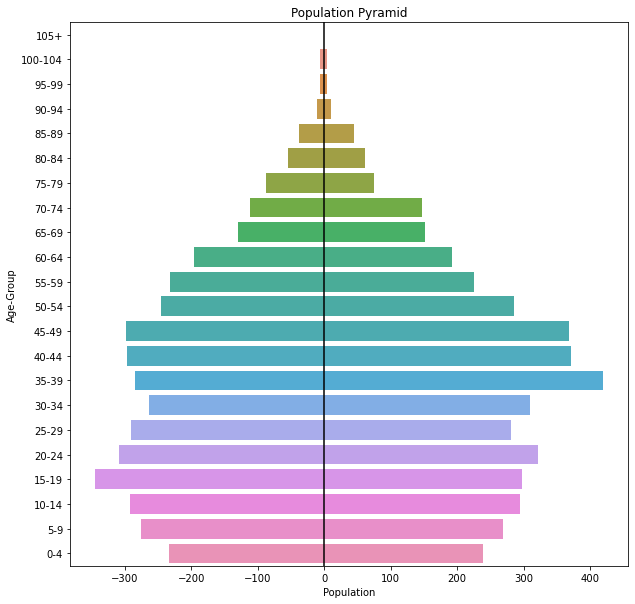

In [128]:
#generate a population pyramid using seaborn
Age_order = ['105+','100-104','95-99', '90-94', '85-89', '80-84', '75-79', '70-74', '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '35-39', '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4']
plt.figure(figsize=[10,10])
bar_plot = sns.barplot(x='Male_x', y='Age group', data=df_p, order=Age_order)

bar_plot = sns.barplot(x='Female', y='Age group', data=df_p, order=Age_order)

bar_plot.set(xlabel="Population", ylabel="Age-Group", title = "Population Pyramid")
plt.axvline(x=0, color='black');

- The population shows that there are more young people and middle aged people.
- The older age (from 65 to 120) is shrinking.

### Gender

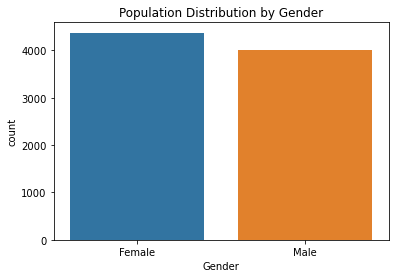

In [133]:
sns.countplot(data=df, x='Gender')
plt.title('Population Distribution by Gender');

- There are more females than males in the population

In [131]:
df['Gender'].value_counts()

Female    4374
Male      4003
Name: Gender, dtype: int64

In [132]:
df.groupby('Gender')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,4374.0,36.779378,21.538919,0.0,19.0,37.0,51.0,116.0
Male,4003.0,35.787659,22.034544,0.0,17.0,34.0,52.0,112.0


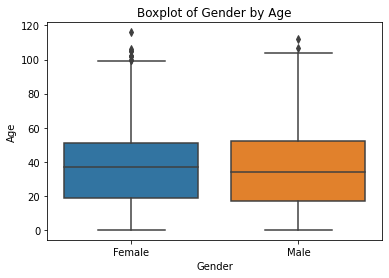

In [134]:
sns.boxplot(data=df, x='Gender', y='Age')
plt.title('Boxplot of Gender by Age');

- Seems like there are older females than males. The average age of females is more than that of males.

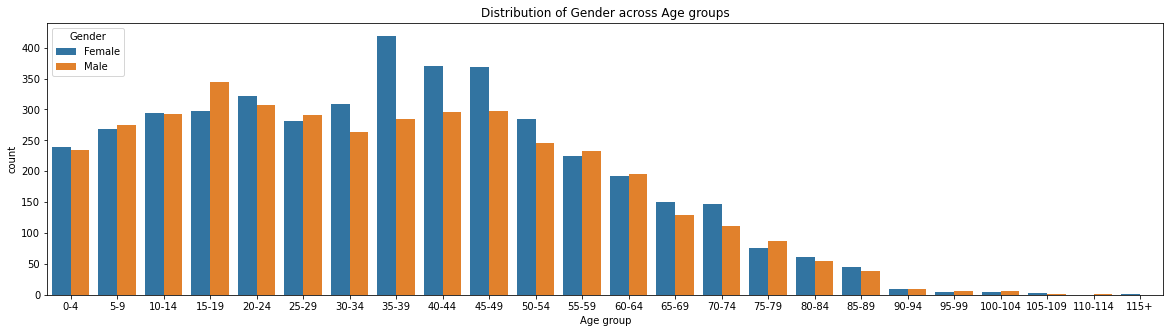

In [170]:
plt.figure(figsize=[20,5])
sns.countplot(data=df, x='Age group', hue='Gender')
plt.title('Distribution of Gender across Age groups');

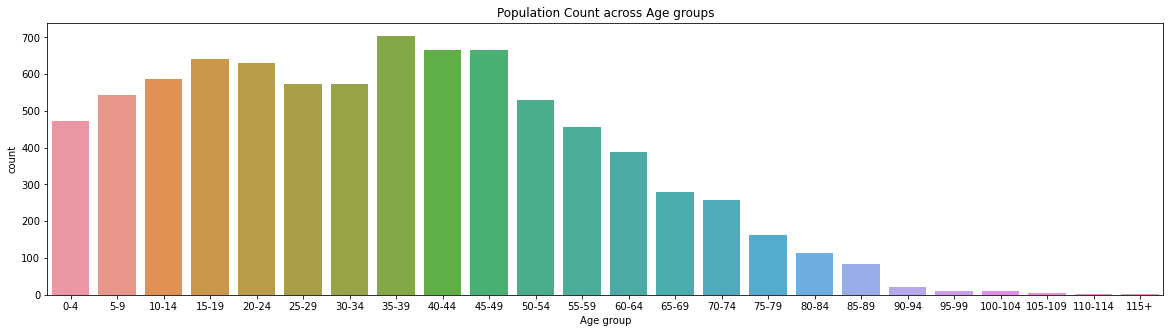

In [202]:
plt.figure(figsize=[20,5])
sns.countplot(data=df, x='Age group')
plt.title('Population Count across Age groups');

### Unemployment Trend

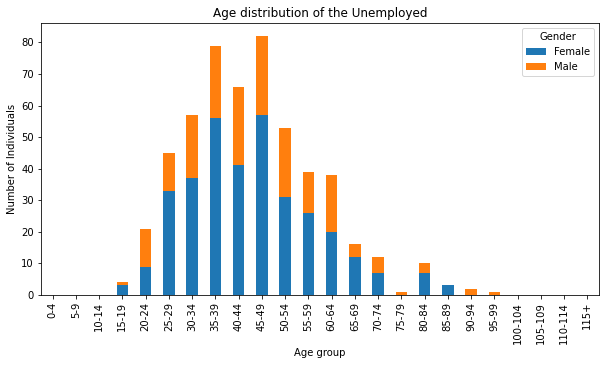

In [204]:
df_unemployed = df[df.Occupation == "Unemployed"]
unemployed = df_unemployed.groupby(['Age group','Gender']).size().reset_index(name='count')

# Pivot the table to create unemployed population pyramid
unemployed_p = unemployed.pivot_table(values='count', index='Age group', columns='Gender')

# Plot the population pyramid
unemployed_p.plot(kind='bar', stacked=True, figsize=(10,5))
plt.ylabel('Number of Individuals')
plt.xlabel('Age group')
plt.title('Age distribution of the Unemployed')
plt.show()

- Age group 45-49 has the highest number of unemployed followed by age group 35-39.
- Across the age groups, female are more unemployed than males

In [136]:
df_unemployed['Gender'].value_counts(normalize=True)

Female    0.646503
Male      0.353497
Name: Gender, dtype: float64

- ~65% of the unemployed populace is made up of female.

In [219]:
df['Employment Status'].value_counts(normalize=True) *100

Employed              53.694640
Student               18.908917
Retiree                8.953086
University Student     6.482034
Unemployed             6.314910
Child                  5.646413
Name: Employment Status, dtype: float64

### Religion

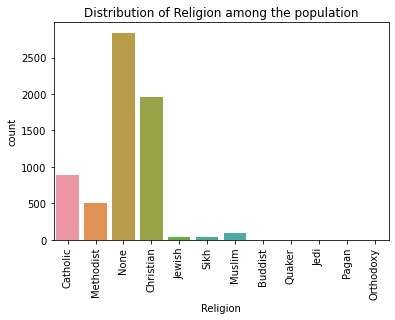

In [142]:
sns.countplot(data=df, x='Religion').set_title('Distribution of Religion among the population')
plt.xticks(rotation=90);

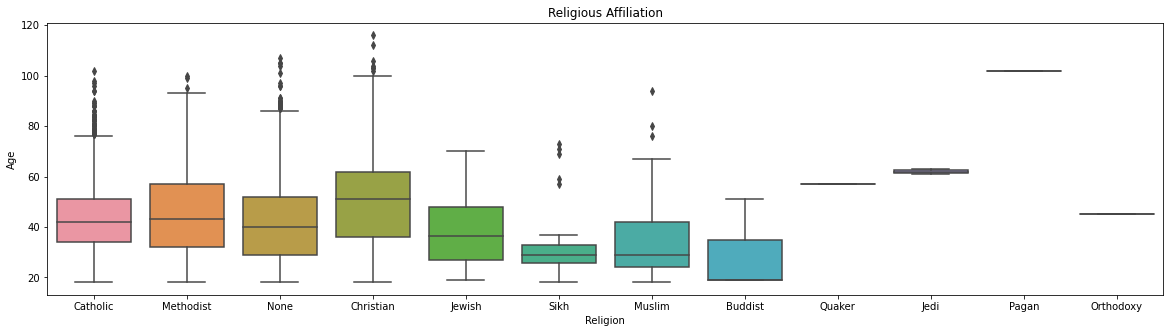

In [162]:
plt.figure(figsize=[20,5])
sns.boxplot(data=df, x='Religion', y='Age').set_title("Religious Affiliation");

In [139]:
df.groupby('Religion')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Religion,,,,,,,,
Buddist,3.0,29.666667,18.475209,19.0,19.00,19.0,35.0,51.0
Catholic,885.0,44.114124,16.228483,18.0,34.00,42.0,51.0,102.0
Christian,1956.0,49.942229,18.229041,18.0,36.00,51.0,62.0,116.0
Jedi,2.0,62.000000,1.414214,61.0,61.50,62.0,62.5,63.0
Jewish,36.0,39.611111,14.959522,19.0,27.00,36.5,48.0,70.0
Methodist,499.0,45.663327,17.872678,18.0,32.00,43.0,57.0,100.0
Muslim,97.0,34.556701,14.879354,18.0,24.00,29.0,42.0,94.0
None,2840.0,42.118310,16.694278,18.0,29.00,40.0,52.0,107.0
Orthodoxy,1.0,45.000000,NaN,45.0,45.00,45.0,45.0,45.0


In [144]:
df['Religion'].value_counts(normalize=True) * 100

None         44.647068
Christian    30.749882
Catholic     13.912907
Methodist     7.844679
Muslim        1.524917
Sikh          0.628832
Jewish        0.565949
Buddist       0.047162
Jedi          0.031442
Quaker        0.015721
Pagan         0.015721
Orthodoxy     0.015721
Name: Religion, dtype: float64

In [206]:
df['Religion'].value_counts()

None         2840
Christian    1956
Catholic      885
Methodist     499
Muslim         97
Sikh           40
Jewish         36
Buddist         3
Jedi            2
Quaker          1
Pagan           1
Orthodoxy       1
Name: Religion, dtype: int64

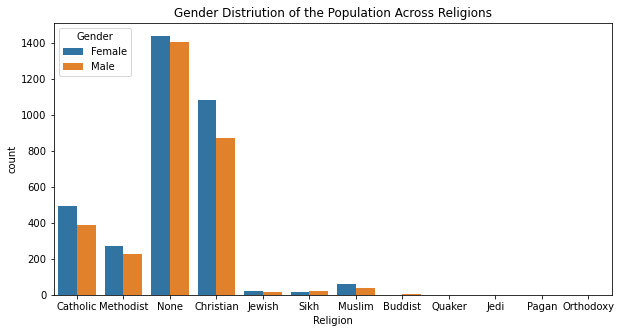

In [205]:
plt.figure(figsize=[10,5])
sns.countplot(data=df, x='Religion', hue='Gender')
plt.title('Gender Distriution of the Population Across Religions');

- Most people have no religion.
- The most frequent religion is "Christian" followed by "Catholic" and then "Methodist".
- The female population seems more religious.

### Household Occupancy

In [147]:
df['Occupancy level'].describe()

count    8377.000000
mean        4.095619
std         3.029196
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max        22.000000
Name: Occupancy level, dtype: float64

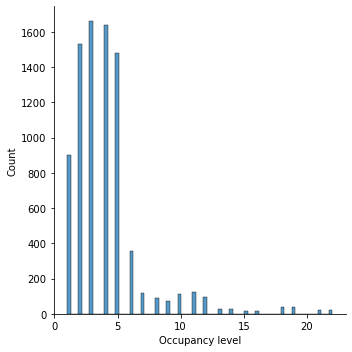

In [148]:
sns.displot(data=df, x='Occupancy level');

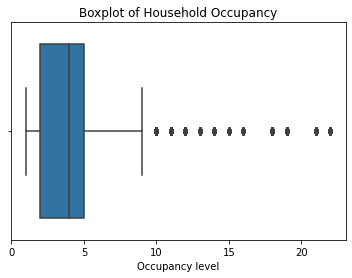

In [207]:
sns.boxplot(data=df, x='Occupancy level')
plt.title('Boxplot of Household Occupancy');

In [149]:
df['Occupancy level'].value_counts()

3     1662
4     1640
2     1532
5     1480
1      901
6      354
11     121
7      119
10     110
12      96
8       88
9       72
19      38
18      36
14      28
13      26
22      22
21      21
16      16
15      15
Name: Occupancy level, dtype: int64

- The most common occupancy rate is 3
- The median occupancy level is 4.
- The highest occupancy level is 22.

### Marital Status

In [150]:
df.groupby('Marital Status')['Occupancy level'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital Status,,,,,,,,
Divorced,791.0,4.018963,3.734329,1.0,1.0,3.0,5.0,22.0
Married,2224.0,3.530576,2.016790,2.0,2.0,3.0,4.0,22.0
Single,3000.0,4.267667,3.348197,1.0,2.0,4.0,5.0,22.0
Widowed,387.0,2.715762,3.802349,1.0,1.0,1.0,3.0,22.0


In [173]:
df_married = df[df['Marital Status'] == "Married"]
df_single = df[df['Marital Status'] == "Single"]
df_divorced = df[df['Marital Status'] == "Divorced"]
df_widowed = df[df['Marital Status'] == "Widowed"]

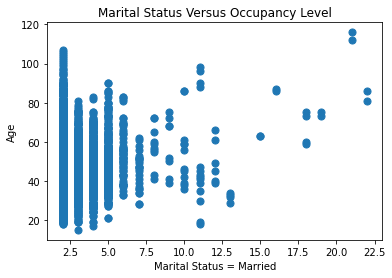

In [178]:
df_married.plot.scatter(x='Occupancy level', y='Age', s=50)
plt.xlabel("Marital Status = Married")
plt.title('Marital Status Versus Occupancy Level');

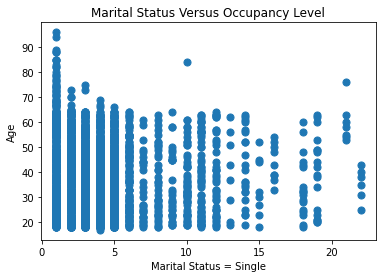

In [179]:
df_single.plot.scatter(x='Occupancy level', y='Age', s=50)
plt.xlabel("Marital Status = Single")
plt.title('Marital Status Versus Occupancy Level');

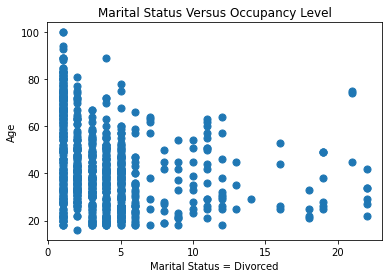

In [180]:
df_divorced.plot.scatter(x='Occupancy level', y='Age', s=50)
plt.xlabel("Marital Status = Divorced")
plt.title('Marital Status Versus Occupancy Level');

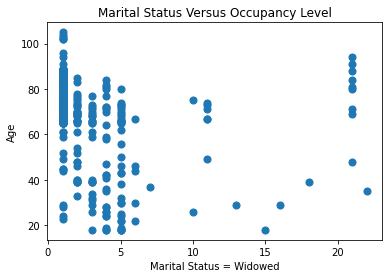

In [181]:
df_widowed.plot.scatter(x='Occupancy level', y='Age', s=50)
plt.xlabel("Marital Status = Widowed")
plt.title('Marital Status Versus Occupancy Level');

- The Scatter plots above show that Singles occupy all and even the high occupancy rates which confirms co-habitation among people who are not related especially young and middle aged people.
- Married people occupy more of the occupancy rates between 2 and 7. This is due to the children and adopted children that make up the family unit.
- The Widowed also occupy more of very low occupancy rates of 1 to 5.
- The Divorced also occupy more of occupancy rates of 1 to 5.

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8377 entries, 0 to 8376
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House Number                   8377 non-null   int64   
 1   Street                         8377 non-null   object  
 2   First Name                     8377 non-null   object  
 3   Surname                        8377 non-null   object  
 4   Age                            8377 non-null   int32   
 5   Relationship to Head of House  8377 non-null   object  
 6   Marital Status                 6402 non-null   object  
 7   Gender                         8377 non-null   object  
 8   Occupation                     8377 non-null   object  
 9   Infirmity                      8364 non-null   object  
 10  Religion                       6361 non-null   object  
 11  Employment Status              8377 non-null   object  
 12  Age group                      837

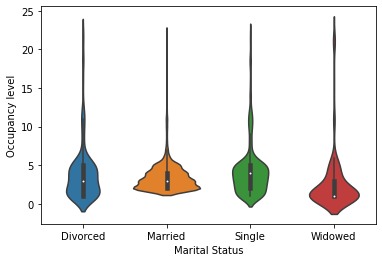

In [154]:
sns.violinplot(data=df, x='Marital Status', y='Occupancy level')
plt.xlabel('Marital Status')
plt.ylabel('Occupancy level');

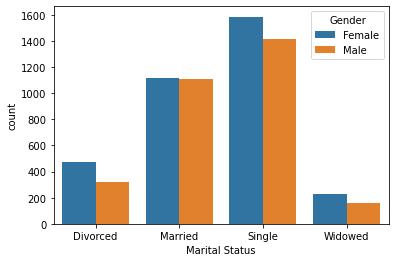

In [163]:
sns.countplot(data=df, x='Marital Status', hue='Gender');

- Generally, there are more females in the popuulation.
- However, there are more divorced females than males.

### Divorce and Marriage Ratio

In [165]:
df.groupby('Marital Status')['Gender'].value_counts()

Marital Status  Gender
Divorced        Female     474
                Male       317
Married         Female    1119
                Male      1105
Single          Female    1585
                Male      1415
Widowed         Female     226
                Male       161
Name: Gender, dtype: int64

- To calculate the Divorce to Marriage ratio, the number of divorced females will be put into consideration and the number of married people divided by 2 will be used. 

- divorced_fenale = 474
- married = 2224/2 = 1112

- divorce to marriage ratio- 1:43
- This shows that there is one divorce for every 43 marriages

### Commuters

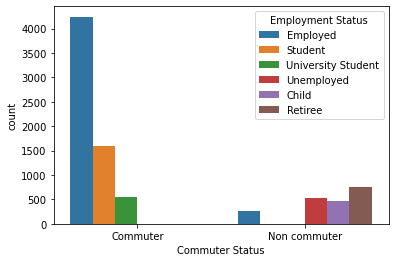

In [216]:
sns.countplot(data=df, x='Commuter Status', hue='Employment Status');

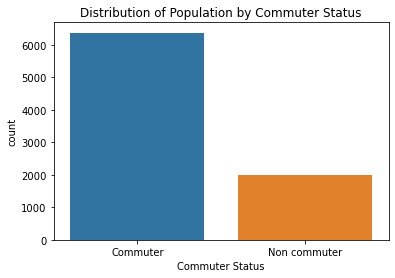

In [217]:
sns.countplot(data=df, x='Commuter Status')
plt.title('Distribution of Population by Commuter Status');

In [218]:
df['Commuter Status'].value_counts(normalize=True) * 100

Commuter        76.029605
Non commuter    23.970395
Name: Commuter Status, dtype: float64

- Approximately 51% of the population commute to nearby cities.

### Relationships

In [166]:
df['Relationship to Head of House'].value_counts()

Head                     3073
Son                      1427
Daughter                 1336
Husband                   809
None                      599
Wife                      299
Lodger                    281
Partner                   242
Granddaughter              86
Grandson                   69
Cousin                     38
Sibling                    32
Visitor                    21
Step-Daughter              16
Adopted Daughter           12
Nephew                     10
Adopted Son                10
Step-Son                    9
Neice                       6
Adopted Granddaughter       2
Name: Relationship to Head of House, dtype: int64

##### How Religion affect the age at which divorce occurs.

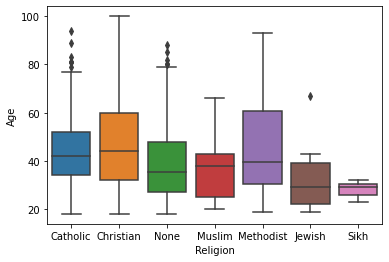

In [197]:
sns.boxplot(data=df_divorced, x='Religion', y='Age');

In [220]:
df['Age group'].value_counts(normalize=True) * 100

35-39      8.403963
40-44      7.962278
45-49      7.950340
15-19      7.651904
20-24      7.520592
10-14      6.995344
30-34      6.840158
25-29      6.828220
5-9        6.493972
50-54      6.326847
0-4        5.646413
55-59      5.455414
60-64      4.643667
65-69      3.342485
70-74      3.079862
75-79      1.933867
80-84      1.372806
85-89      0.990808
90-94      0.238749
100-104    0.131312
95-99      0.119374
105-109    0.047750
110-114    0.011937
115+       0.011937
Name: Age group, dtype: float64

### Birth rate
- Since the last time the census was conducted is the last ten years, the birth rate will include the number of children from age 0 to 9.
- Crude birth rate = Number of births (0-9)/ population count * 1000

In [208]:
df['Age group'].value_counts()

35-39      704
40-44      667
45-49      666
15-19      641
20-24      630
10-14      586
30-34      573
25-29      572
5-9        544
50-54      530
0-4        473
55-59      457
60-64      389
65-69      280
70-74      258
75-79      162
80-84      115
85-89       83
90-94       20
100-104     11
95-99       10
105-109      4
110-114      1
115+         1
Name: Age group, dtype: int64

- Age groups 0-4, 5-9 = 473 + 544 = 1017
- 1017/8377 * 1000 = 121 births per thousand

### Infirmity

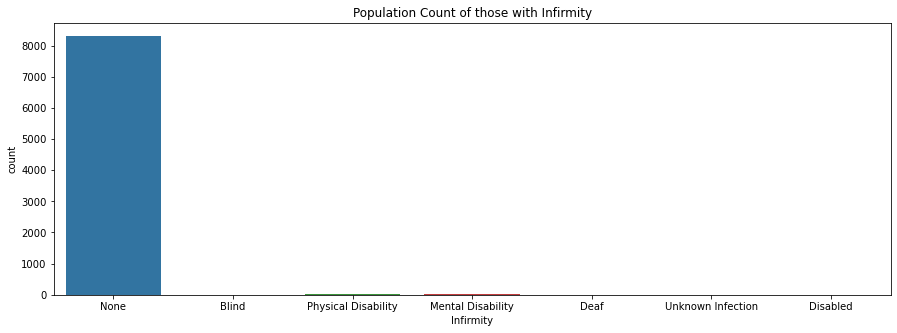

In [227]:
plt.figure(figsize=[15,5])
sns.countplot(data=df, x='Infirmity')
plt.title('Population Count of those with Infirmity');

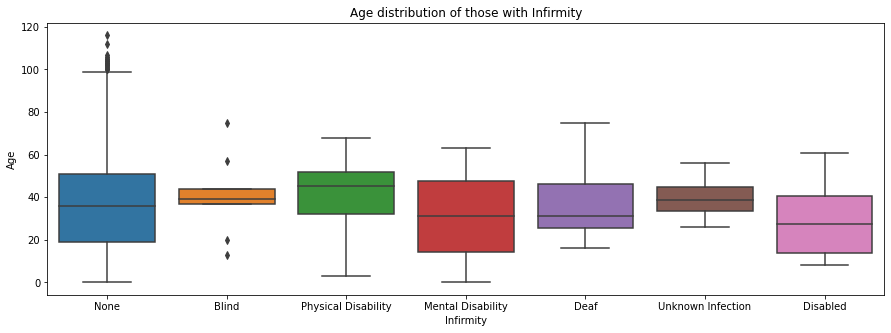

In [224]:
plt.figure(figsize=[15,5])
sns.boxplot(data=df, x='Infirmity', y='Age')
plt.title('Age distribution of those with Infirmity');

In [225]:
df['Infirmity'].value_counts()

None                   8308
Physical Disability      18
Mental Disability        10
Blind                     9
Disabled                  8
Deaf                      7
Unknown Infection         4
Name: Infirmity, dtype: int64